<a href="https://colab.research.google.com/github/Thorlney/Medical-Insurance-Sales-Prediction/blob/main/MedInsuranceSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [ ]:
insurance = pd.read_csv("/content/drive/MyDrive/Medical_insurance_dataset.csv")
insurance.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,not-purchased
1,15810944,Male,35,20000,not-purchased
2,15668575,Female,26,43000,not-purchased
3,15603246,Female,27,57000,not-purchased
4,15804002,Male,19,76000,not-purchased
5,15728773,Male,27,58000,not-purchased
6,15598044,Female,27,84000,not-purchased
7,15694829,Female,32,150000,purchased
8,15600575,Male,25,33000,not-purchased
9,15727311,Female,35,65000,not-purchased


In [ ]:
insurance.drop(["User ID"], axis = "columns", inplace=True)


In [ ]:
insurance.head(20)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,not-purchased
1,Male,35,20000,not-purchased
2,Female,26,43000,not-purchased
3,Female,27,57000,not-purchased
4,Male,19,76000,not-purchased
5,Male,27,58000,not-purchased
6,Female,27,84000,not-purchased
7,Female,32,150000,purchased
8,Male,25,33000,not-purchased
9,Female,35,65000,not-purchased


In [ ]:
insurance["Purchased"] = insurance["Purchased"].apply(lambda x:1 if x == "purchased" else 0)
insurance.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
#ProfileReport(insurance)


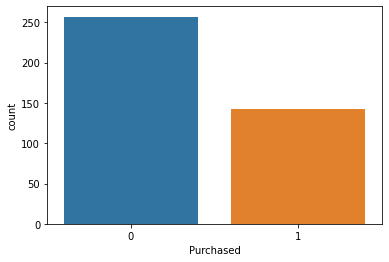

In [ ]:
sns.countplot(x = "Purchased", data = insurance)

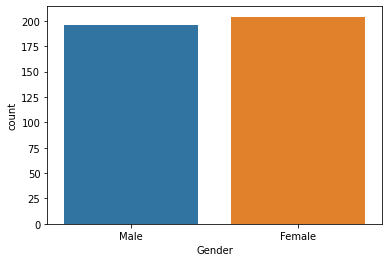

In [ ]:
sns.countplot(x = "Gender", data =insurance)

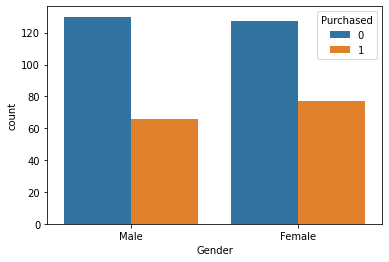

In [ ]:
sns.countplot(x = "Gender", hue = "Purchased", data = insurance)

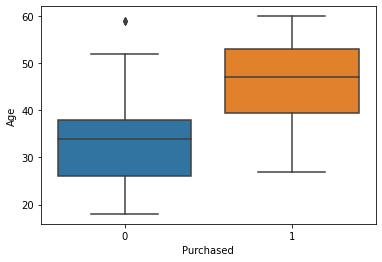

In [ ]:
sns.boxplot(x= "Purchased", y = "Age", data = insurance)

MODEL BUILDING


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
x = insurance.drop(["Purchased"], axis = "columns")
y = insurance["Purchased"]

In [ ]:
x.head(10)

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
5,Male,27,58000
6,Female,27,84000
7,Female,32,150000
8,Male,25,33000
9,Female,35,65000


In [ ]:
pd.get_dummies(insurance["Gender"])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [ ]:
X = pd.get_dummies(x)
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [ ]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
from numpy import where

oversample = SMOTE()
X,y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)


Counter({0: 257, 1: 257})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logistic_prediction = logisticmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, logistic_prediction)

0.4563106796116505

In [ ]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

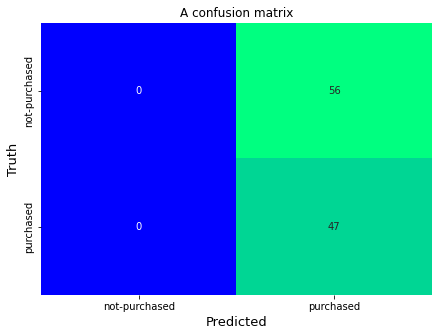

In [ ]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-purchased", "purchased"])

In [ ]:
metrics.accuracy_score(y_test, logistic_prediction)

0.4563106796116505

In [ ]:
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.46      1.00      0.63        47

    accuracy                           0.46       103
   macro avg       0.23      0.50      0.31       103
weighted avg       0.21      0.46      0.29       103



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_prediction = randomforestmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, rf_prediction)

0.9320388349514563

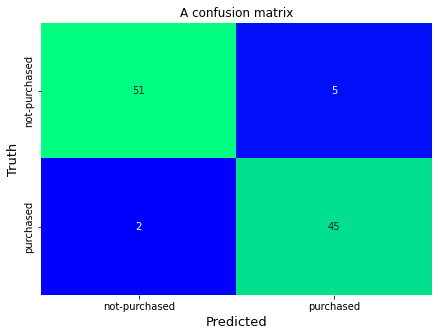

In [ ]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchased", "purchased"])

In [ ]:
metrics.accuracy_score(y_test, rf_prediction)

0.9320388349514563

In [ ]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        56
           1       0.90      0.96      0.93        47

    accuracy                           0.93       103
   macro avg       0.93      0.93      0.93       103
weighted avg       0.93      0.93      0.93       103



In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier(n_estimators= 250)
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [ ]:
rf_prediction = randomforestmodel.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, rf_prediction)

0.9223300970873787

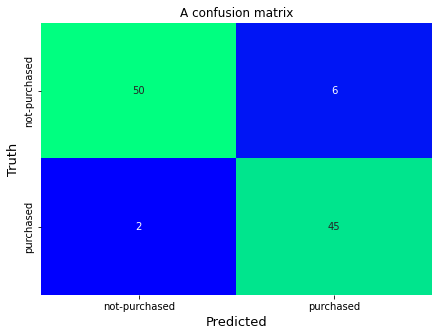

In [ ]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchased", "purchased"])

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, rf_prediction))

0.9183673469387754


In [ ]:
#Saving the model
import pickle
pickle_out = open("rfmodel.pkl", mode = "wb")
pickle.dump(randomforestmodel, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("rfmodel.pkl", 'rb')
clf = pickle.load(pickle_in)

In [ ]:
print(clf.predict([[34,400,1,0]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


BUILDING A WEB APP WITH STREAMLIT

In [ ]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

     |████████████████████████████████| 745 kB 5.0 MB/s 
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 111 kB 41.0 MB/s 
     |████████████████████████████████| 164 kB 68.0 MB/s 
     |████████████████████████████████| 181 kB 41.3 MB/s 
     |████████████████████████████████| 4.3 MB 47.4 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 130 kB 51.7 MB/s 
     |████████████████████████████████| 793 kB 57.0 MB/s 
     |████████████████████████████████| 428 kB 48.5 MB/s 
     |████████████████████████████████| 130 kB 66.2 MB/s 
     |████████████████████████████████| 1.1 MB 59.5 MB/s 
     |████████████████████████████████| 380 kB 76.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 r

In [ ]:
%%writefile app.py
import pickle
import streamlit as st
pickle_in = open('rfmodel.pkl', 'rb') 
clf = pickle.load(pickle_in)

@st.cache()


def make_prediction(Age,EstSalary,Gender):
  if Gender == "Male":
    GenderM = 1
    GenderF = 0
  elif Gender == "Female":
    GenderM = 0
    GenderF = 1

  prediction = clf.predict([[Age, EstSalary, GenderF, GenderM]])[0]  
    
  if prediction == 0:
    value = "not to purchase"
  else:
    value = "to purchase"
  return value

def main():       
    #front end elements
    st.title('Predictive analysis on customers likely to purchase Medical Insurance or not.')
    html_temp = """ 
    <div style ="background-color:red ;padding:13px"> 
    <h1 style ="color:white;text-align:center;">MedPlus Insurance Partners </h1> 
    </div> 
    """
    
    #front end
    st.markdown("![](https://tse2.mm.bing.net/th?id=OIP.otz-ASCXxkDPTu2iLVoDQAHaCd&pid=Api&P=0&w=461&h=153)")
    st.markdown(html_temp, unsafe_allow_html = True) 

    # following lines create boxes in which user can enter data required to make prediction 
    Age = st.number_input('Enter Age')
    EstSalary = st.number_input('Enter Estimated Salary')
    Gender = st.selectbox('Gender',("Male","Female"))
    result = ""
    
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Make Prediction"): 
        result = make_prediction(Age, EstSalary, Gender) 
        st.success('This customer is likely {}'.format(result) + " "+'Medical insurance ')
        print("Just test")
     
if __name__=='__main__':
  main()

Writing app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
# Auth
!ngrok authtoken 273rvweXaXu3akMJBKwQivZ2peF_8oiuSPCeydo6nbhRerSA
public_url = ngrok.connect('8501')
public_url

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


<NgrokTunnel: "http://c6ab-34-73-87-104.ngrok.io" -> "http://localhost:8501">